#***EREN GEMİCİ'YE AİTTİR.***
INOVAKO TEKNİK ELEME
2.01.2024

#**DOSYALARIN YÜKLENMESİ**





# Hazırladığım datasetin gerektirdiği fotoğrafları internet üzerinden derleyip RoboFlow üzerinden etiketlemelerini gerçekleştirdim. Sonunda bir zip dosyası haline getirip drive'a yükledim ve geri kalan çalışmaları bu colab notebook'u üzerinden aktaracağım.

In [ ]:
data_path = "/content/drive/MyDrive/inovako-data-3"

data_path_yaml = "/content/drive/MyDrive/inovako-data-3/data.yaml"

%cd "/content/drive/MyDrive/inovako-data-3/"
!ls

/content/drive/MyDrive/inovako_data
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


# DATASETİ ROBOFLOW API ÜZERİNDEN ALARAK COLAB NOTEBOOKTA KULLANILABİLİR HALE GETİRİYORUM.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0IIKZoBtIZFJqXTaSBYN")
project = rf.workspace("sab-robotics").project("inovako-technical-qualification")
dataset = project.version(4).download("yolov8")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Inovako-Technical-Qualification-4 in yolov8:: 100%|██████████| 366/366 [00:00<00:00, 4667.42it/s]


# Dosya isimlerini değiştirip incelemesi ve düzenlemesi daha kolay olması açısından düzenliyorum.

# Roboflow validation dosyalarını oluşturmak konusunda sıkıntı çıkardığı için kendi scriptimi yazarak validation için dosyaları kendim çektim.

In [ ]:
!mkdir /content/Inovako-Technical-Qualification-4/valid
!mkdir /content/Inovako-Technical-Qualification-4/test
!mkdir /content/Inovako-Technical-Qualification-4/valid/images
!mkdir /content/Inovako-Technical-Qualification-4/valid/labels
!mkdir /content/Inovako-Technical-Qualification-4/test/images
!mkdir /content/Inovako-Technical-Qualification-4/test/labels


# -RASTGELE ŞEKİLDE SEÇİLMİŞ İMAJ DOSYALARINI VALIDATION SETİNE TAŞIDIM.-

In [ ]:
import os
import random
import shutil

def move_random_files(source_directory, destination_directory, num_files=20):
    # Check if the source directory exists
    if not os.path.exists(source_directory):
        print(f"Source directory '{source_directory}' does not exist.")
        return

    # Check if the destination directory exists; if not, create it
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # Get the list of files in the source directory
    files = [f for f in os.listdir(source_directory) if os.path.isfile(os.path.join(source_directory, f))]

    # Ensure the number of files to move is not greater than the total available files
    num_files = min(num_files, len(files))

    # Randomly select num_files files
    selected_files = random.sample(files, num_files)
    print(selected_files)

    # Move the selected files to the destination directory
    for file_name in selected_files:
        source_path = os.path.join(source_directory, file_name)
        destination_path = os.path.join(destination_directory, file_name)

        shutil.move(source_path, destination_path)
        print(f"Moved: {file_name} from '{source_directory}' to '{destination_directory}'")

if __name__ == "__main__":
    # Specify the paths of the source and destination directories
    source_directory_path = "/content/Inovako-Technical-Qualification-4/train/images"
    destination_directory_path = "/content/Inovako-Technical-Qualification-4/valid/images"

    # Call the function to move random files
    move_random_files(source_directory_path, destination_directory_path)


['PP4HK1F0GOM9_jpg.rf.ca4f8fd4962a7cc346913b8566649ccc.jpg', 'CYO0INZ9MJXR_jpg.rf.fd6c19c7e55e715fb60b71fe7e5dd2c0.jpg', 'PP4HK1F0GOM9_jpg.rf.2cd1a1611ddbaf917670718f497d4c43.jpg', 'YP8UQ33OG7FJ_jpg.rf.bda54c2dc0a9aa714f7c12670b5aa344.jpg', 'UO4O9ZJOMR80_jpg.rf.d30d3a53186738e254396785eedd4d65.jpg', '6FLK32RMEFPB_jpg.rf.6e7de8dc29c4e9d695b8efc0ea63f8e4.jpg', '44WX48PI2UCT_jpg.rf.90c252f75459d9b60f01923eceab9f4f.jpg', 'K08MSMSHV30V_jpg.rf.ca98e4762800c393b16f3d95cab928de.jpg', '0IWU3GPN2V8Y_jpg.rf.0c80470c251445fee49fe2301bb77a3b.jpg', '42CLYF45HZPY_jpg.rf.15bd97cca84282d2845e51a88d790b50.jpg', 'FPP9O4XGGGKL_jpg.rf.5623fbca7623c698a76aff243d63e2b7.jpg', 'UXZ2G5TIFC4J_jpg.rf.eacdefda45cf117f2d79bc9f85cffbb7.jpg', '27VKSQQ8JJTB_jpg.rf.2ef7479a71ec5eccf41f20c1a9e056be.jpg', 'GEBI4EZU95ZQ_jpg.rf.14db2d6048a358a70b9109e26c22857b.jpg', '0SYOXCUEWXWK_jpg.rf.09819308b7adfcf08c898a9e8659edbc.jpg', '2ALR9GN3E4VY_jpg.rf.28d4fb5c8b0691a2d9f8df4d064a87fe.jpg', 'UXZ2G5TIFC4J_jpg.rf.406e6d38b0afeb979a

# **ÜSTTEKİ FONKSİYONDA SEÇİLMİŞ OLAN İMAJ DOSYALARININ ETİKETLERİNİN BULUNDUĞU TXT DOSYALARINI DA VALIDATION SETİNE TAŞIDIM.**

In [ ]:
import os
import random
import shutil

def move_random_files(source_directory, destination_directory, num_files=20):
    # Check if the source directory exists
    if not os.path.exists(source_directory):
        print(f"Source directory '{source_directory}' does not exist.")
        return

    # Check if the destination directory exists; if not, create it
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # Get the list of files in the source directory
    files = [f for f in os.listdir(source_directory) if os.path.isfile(os.path.join(source_directory, f))]

    # Ensure the number of files to move is not greater than the total available files
    num_files = min(num_files, len(files))

    # Randomly select num_files files
    selected_files = ['PP4HK1F0GOM9_jpg.rf.ca4f8fd4962a7cc346913b8566649ccc.jpg',
                      'CYO0INZ9MJXR_jpg.rf.fd6c19c7e55e715fb60b71fe7e5dd2c0.jpg',
                      'PP4HK1F0GOM9_jpg.rf.2cd1a1611ddbaf917670718f497d4c43.jpg',
                      'YP8UQ33OG7FJ_jpg.rf.bda54c2dc0a9aa714f7c12670b5aa344.jpg',
                      'UO4O9ZJOMR80_jpg.rf.d30d3a53186738e254396785eedd4d65.jpg',
                      '6FLK32RMEFPB_jpg.rf.6e7de8dc29c4e9d695b8efc0ea63f8e4.jpg',
                      '44WX48PI2UCT_jpg.rf.90c252f75459d9b60f01923eceab9f4f.jpg',
                      'K08MSMSHV30V_jpg.rf.ca98e4762800c393b16f3d95cab928de.jpg',
                      '0IWU3GPN2V8Y_jpg.rf.0c80470c251445fee49fe2301bb77a3b.jpg',
                      '42CLYF45HZPY_jpg.rf.15bd97cca84282d2845e51a88d790b50.jpg',
                      'FPP9O4XGGGKL_jpg.rf.5623fbca7623c698a76aff243d63e2b7.jpg',
                      'UXZ2G5TIFC4J_jpg.rf.eacdefda45cf117f2d79bc9f85cffbb7.jpg',
                      '27VKSQQ8JJTB_jpg.rf.2ef7479a71ec5eccf41f20c1a9e056be.jpg',
                      'GEBI4EZU95ZQ_jpg.rf.14db2d6048a358a70b9109e26c22857b.jpg',
                      '0SYOXCUEWXWK_jpg.rf.09819308b7adfcf08c898a9e8659edbc.jpg',
                      '2ALR9GN3E4VY_jpg.rf.28d4fb5c8b0691a2d9f8df4d064a87fe.jpg',
                      'UXZ2G5TIFC4J_jpg.rf.406e6d38b0afeb979a3eb650181e20e9.jpg',
                      'F05L6AH2T0VR_jpg.rf.0f843e300cbdc4edc4d297d0c6995873.jpg',
                      '5B6LKNOHJLIQ_jpg.rf.b1aa4fee6f5543c3c9c97a275e397682.jpg',
                      '2ALR9GN3E4VY_jpg.rf.03c4344be413e8a2765b9db821d93786.jpg']









    for i in range(len(selected_files)):
        # Split the file name and extension
        base_name, extension = os.path.splitext(selected_files[i])

        # Check if the extension is ".jpg"
        if extension.lower() == ".jpg":
            # Construct the new file name with the ".txt" extension
            new_file_name = base_name + ".txt"

            selected_files[i] = new_file_name

            # Print the old and new file names (optional)




    # Move the selected files to the destination directory
    for file_name in selected_files:
        source_path = os.path.join(source_directory, file_name)
        destination_path = os.path.join(destination_directory, file_name)

        shutil.move(source_path, destination_path)
        print(f"Moved: {file_name} from '{source_directory}' to '{destination_directory}'")

if __name__ == "__main__":
    # Specify the paths of the source and destination directories
    source_directory_path = "/content/Inovako-Technical-Qualification-4/train/labels"
    destination_directory_path = "/content/Inovako-Technical-Qualification-4/valid/labels"

    # Call the function to move random files
    move_random_files(source_directory_path, destination_directory_path)

Moved: PP4HK1F0GOM9_jpg.rf.ca4f8fd4962a7cc346913b8566649ccc.txt from '/content/Inovako-Technical-Qualification-4/train/labels' to '/content/Inovako-Technical-Qualification-4/valid/labels'
Moved: CYO0INZ9MJXR_jpg.rf.fd6c19c7e55e715fb60b71fe7e5dd2c0.txt from '/content/Inovako-Technical-Qualification-4/train/labels' to '/content/Inovako-Technical-Qualification-4/valid/labels'
Moved: PP4HK1F0GOM9_jpg.rf.2cd1a1611ddbaf917670718f497d4c43.txt from '/content/Inovako-Technical-Qualification-4/train/labels' to '/content/Inovako-Technical-Qualification-4/valid/labels'
Moved: YP8UQ33OG7FJ_jpg.rf.bda54c2dc0a9aa714f7c12670b5aa344.txt from '/content/Inovako-Technical-Qualification-4/train/labels' to '/content/Inovako-Technical-Qualification-4/valid/labels'
Moved: UO4O9ZJOMR80_jpg.rf.d30d3a53186738e254396785eedd4d65.txt from '/content/Inovako-Technical-Qualification-4/train/labels' to '/content/Inovako-Technical-Qualification-4/valid/labels'
Moved: 6FLK32RMEFPB_jpg.rf.6e7de8dc29c4e9d695b8efc0ea63f8e4.

# **ÇALIŞMA ALANININ KONTROLÜ VE HAZIRLIKLARI İÇİN COLAB DEFAULT OLAN T4 EKRAN KARTINA GEÇİŞ YAPTIM**

In [ ]:
!nvidia-smi

Wed Jan  3 10:26:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# **GEREKEN KÜTÜPHANE YÜKLEMELERİNİ GERÇEKLEŞTİRİYORUM.**

In [ ]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


# **ULTRALYTICS KÜTÜPHANESİNDEN YOLO'YU İÇERİ AKTARDIM.**

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# **MODELİN EĞİTİMİ**

# **> MODELİ EĞİTMEK İÇİN PYTHON KODU YAZMAK YERİNE LINUX TERMINAL ÜZERİNDEN HALLETMEK İSTEDİM. YOLO'YU ÇALIŞTIRIP SEGMENTATION GÖREVİ VEREREK TRAIN DATASINI İŞLEMEYE BAŞLAMASI KOMUTUNU GİRDİM. VERİ YOLLARINI VE PARAMETRELERİ GİRDİKTEN SONRA MODELİ EĞİTİME BIRAKTIM.**




In [ ]:
!yolo task=segment mode=train model=yolov8s-seg.pt data="/content/Inovako-Technical-Qualification-4/data.yaml" epochs=20 imgsz=640

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/Inovako-Technical-Qualification-4/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, sim

# **MODELİN EĞİTİMİ BİTTİKTEN SONRA MODELİMİN DOĞRULUĞUNU KONTROL ETMEK AMACIYLA YOLO'YU VALIDATION MODUNDA ÇALIŞTIRDIM.**

In [ ]:
!yolo task=segment mode=val model="/content/runs/segment/train2/weights/best.pt" data="/content/Inovako-Technical-Qualification-4/data.yaml"

2024-01-03 10:34:06.903991: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-03 10:34:06.904061: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-03 10:34:06.905605: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 10:34:07.924362: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/Inovako-Technical-Qualification-4/valid/labe

#  **VALIDATION DEĞERLERİNİN BENİ TATMİN ETMESİ ÜZERİNE DE MODELIN SONUÇLARINI GÖRSEL OLARAK İNCELEYEBİLMEK AMACIYLA PREDICTION MODUNA ALDIM VE MODELİ OLUŞTURDUĞUM TEST DATASETİ ÜZERİNDE TEST ETTİM.**

In [ ]:
!yolo task=segment mode=predict model="/content/runs/segment/train2/weights/best.pt" conf=0.25 source="/content/drive/MyDrive/inovako-data-3/test/images" save=true

2024-01-03 10:51:26.202732: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-03 10:51:26.202783: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-03 10:51:26.204240: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 10:51:27.227549: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs

image 1/74 /content/drive/MyDrive/inovako-data-3/test/images/09BOD

In [ ]:
!cp -r /content/runs /content/drive/MyDrive/

In [19]:
!cp -r /content/Inovako-Technical-Qualification-4 /content/drive/MyDrive

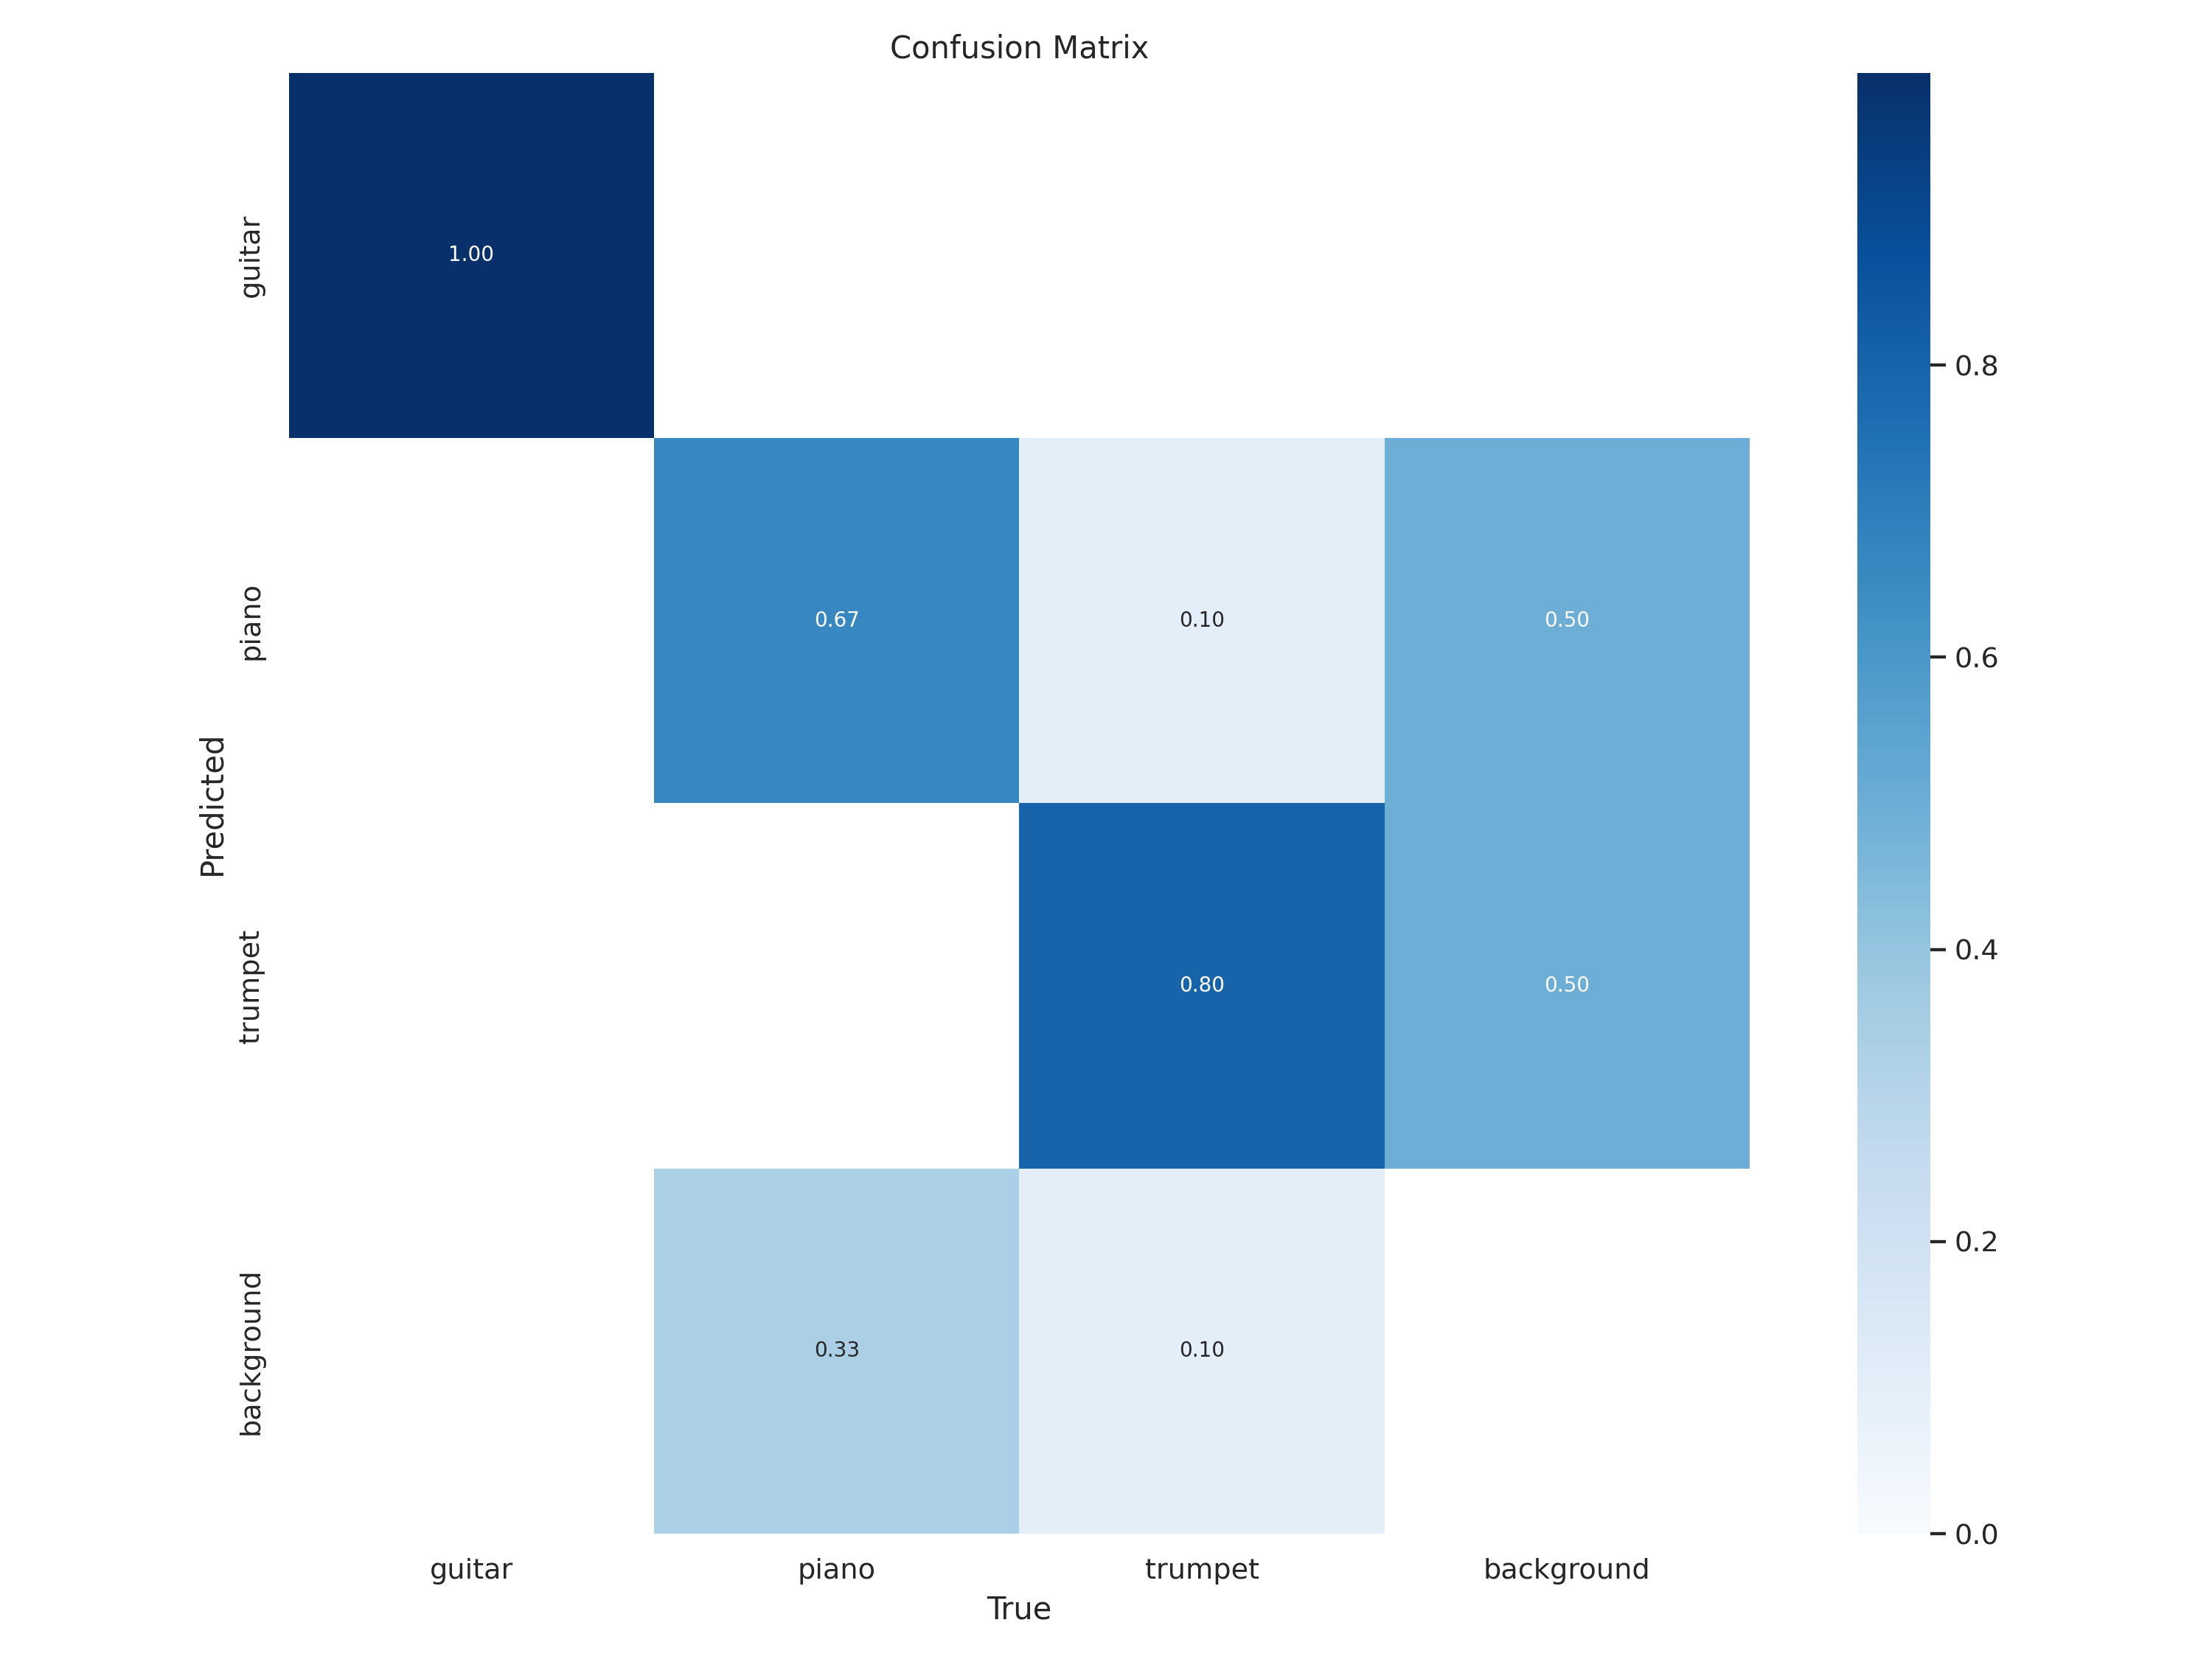

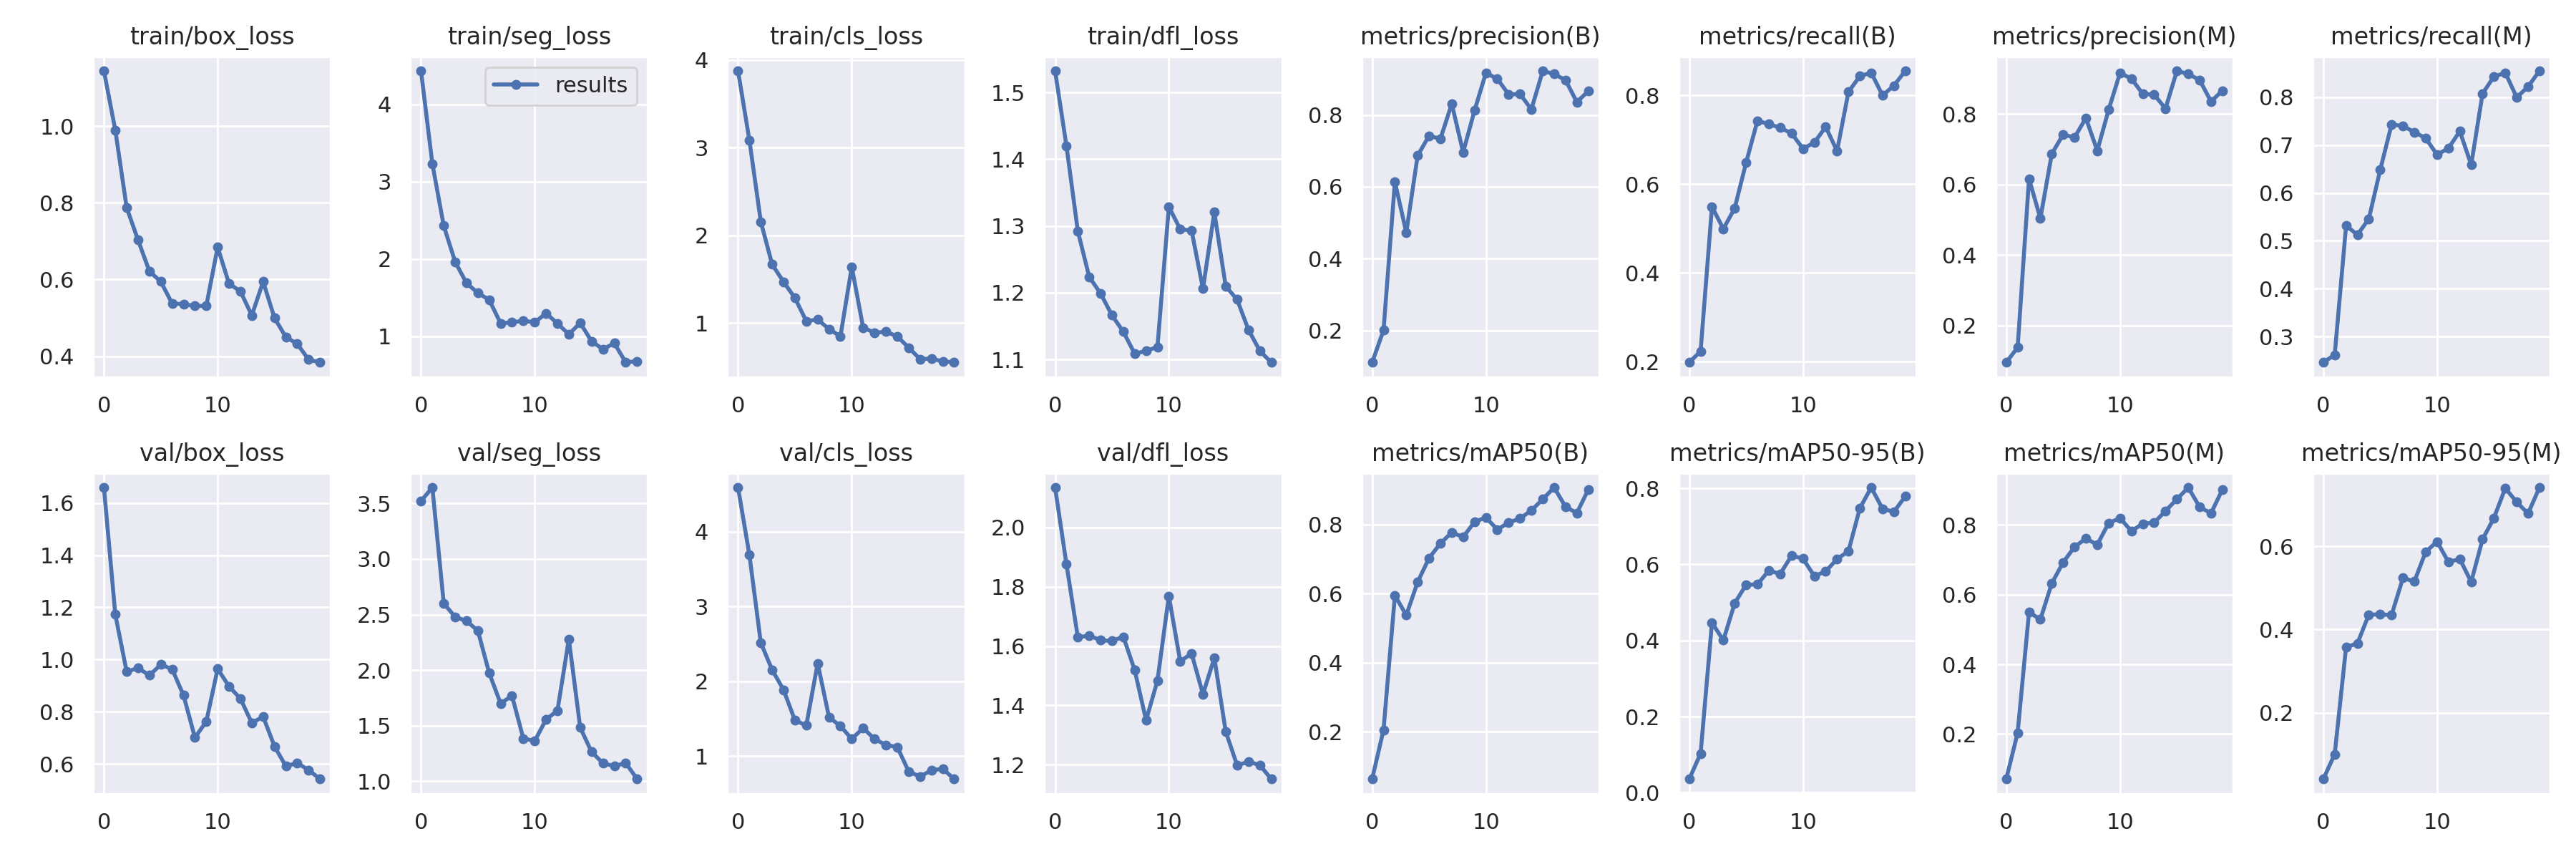

In [27]:
from IPython.display import Image, display

display(Image(filename=f"/content/runs/segment/train2/confusion_matrix.png"))

display(Image(filename=f"/content/runs/segment/train2/results.png"))

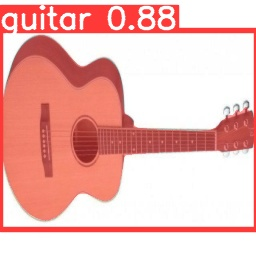

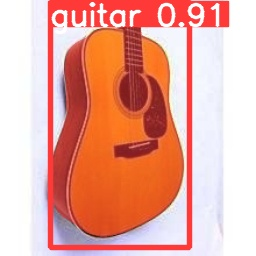

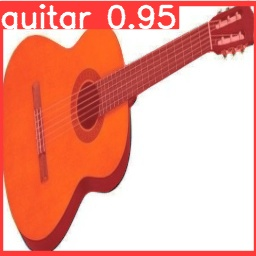

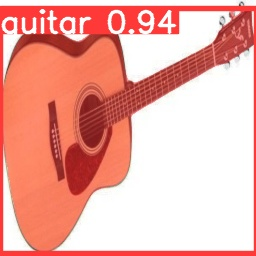

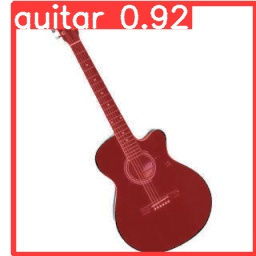

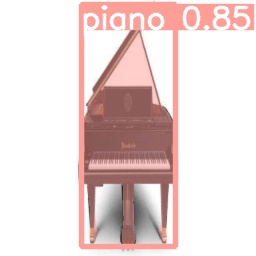

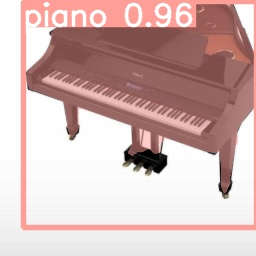

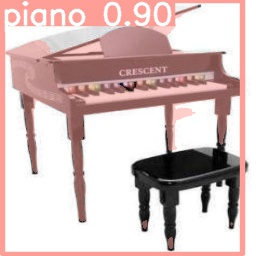

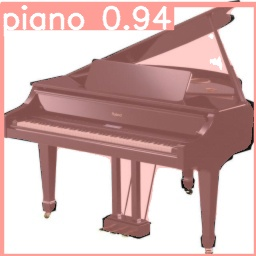

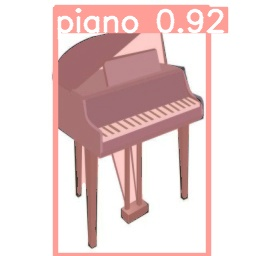

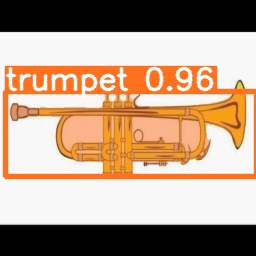

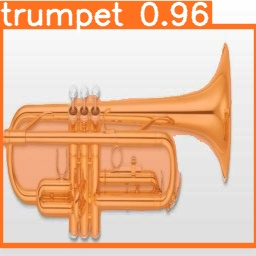

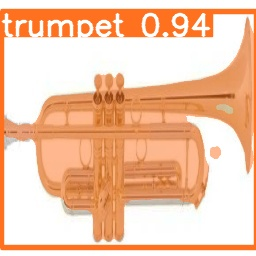

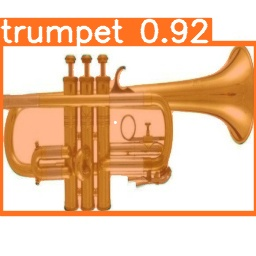

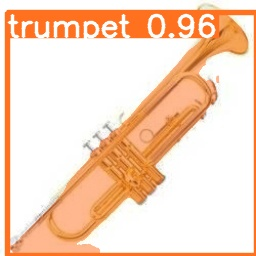

In [26]:
from IPython.display import Image, display

import os



# Specify the filename of the uploaded image
guitar1 = f'/content/drive/MyDrive/runs/segment/predict2/gitar/A2XH7IHA94KA.jpg'
guitar2 = f"/content/drive/MyDrive/runs/segment/predict2/gitar/ISZU6DDU3OL9.jpg"
guitar3 = f"/content/drive/MyDrive/runs/segment/predict2/gitar/J8O47SCR7TFY.jpg"
guitar4 = f"/content/drive/MyDrive/runs/segment/predict2/gitar/JQ50U0KZATJ5.jpg"
guitar5 = f"/content/drive/MyDrive/runs/segment/predict2/gitar/X0KYBKN1UVB4.jpg"
trumpet1= f"/content/drive/MyDrive/runs/segment/predict2/trompet/2PMGVQZ6DTSW.jpg"
trumpet2 = f"/content/drive/MyDrive/runs/segment/predict2/trompet/BQUBNAILD0Y3.jpg"
trumpet3 = f"/content/drive/MyDrive/runs/segment/predict2/trompet/OZO5W3GO9QCR.jpg"
trumpet4 = f"/content/drive/MyDrive/runs/segment/predict2/trompet/ROKUYVLVK99D.jpg"
trumpet5 = f"/content/drive/MyDrive/runs/segment/predict2/trompet/UHYBOSOOEFCM.jpg"
piano1 = f"/content/drive/MyDrive/runs/segment/predict2/piano/53CFV7NJG1A5.jpg"
piano2 = f"/content/drive/MyDrive/runs/segment/predict2/piano/7UULTE4RRFX1.jpg"
piano3 = f"/content/drive/MyDrive/runs/segment/predict2/piano/9X0M7P2T0KOZ.jpg"
piano4 = f"/content/drive/MyDrive/runs/segment/predict2/piano/QRYMT37X2NWX.jpg"
piano5 = f"/content/drive/MyDrive/runs/segment/predict2/piano/UDG27JUM9PK3.jpg"


# Display the image
display(Image(filename=guitar1))
display(Image(filename=guitar2))
display(Image(filename=guitar3))
display(Image(filename=guitar4))
display(Image(filename=guitar5))
display(Image(filename=piano1))
display(Image(filename=piano2))
display(Image(filename=piano3))
display(Image(filename=piano4))
display(Image(filename=piano5))
display(Image(filename=trumpet1))
display(Image(filename=trumpet2))
display(Image(filename=trumpet3))
display(Image(filename=trumpet4))
display(Image(filename=trumpet5))
